In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Görev 1: Keşifci Veri Analizi

## Adım 1:

* Genel resmi inceleyiniz.

> 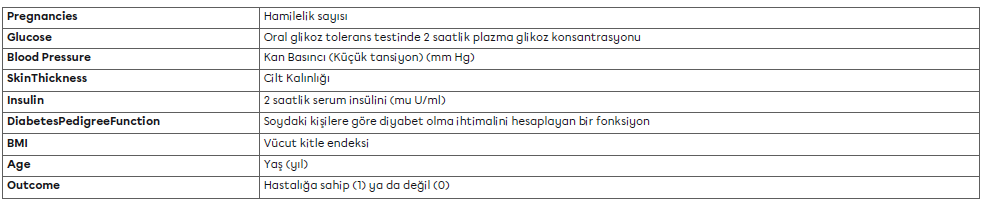

In [6]:
df = pd.read_csv("diabetes.csv")

In [9]:
def check_df(dataframe, head=5):
    print("############## Shape ##############")
    print(dataframe.shape)
    
    print("############## Types ##############")
    print(dataframe.dtypes)
    
    print("############## Head ##############")
    print(dataframe.head(head))
    
    print("############## Tail ##############")
    print(dataframe.tail(head))
    
    print("############## NA ##############")
    print(dataframe.isnull().sum())
    
    print("############## Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)

check_df(df)

############## Shape ##############
(768, 9)
############## Types ##############
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
############## Head ##############
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21      

## Adım 2:

* Numerik ve kategorik değişkenleri yakalayınız.

In [12]:
# Datamızda "Outcome" dışında kategorik bir değişken yok.
# "Outcome" kolonumuz Encoding halde tutuluyor.

def grab_col_names(dataframe, cat_th=10, car_th=20):
        #cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    # Encoding halde tutulan ve "cat_th" den daha az unique değişkene sahip cat. değişkenler
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtype != "O" and dataframe[col].nunique() < cat_th]
    
    # "Name" gibi object olmasına rağmen kategorik olmayan yani her değer birbiriyle bağımsız olabilecek kapasitede. Bir anlam ifade etmeyen
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype == "O" and dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat # Kategorik + Encoding Cat.
    cat_cols = [col for col in cat_cols if col not in cat_but_car] # Cardinal olanları ayıkla
    
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 
    num_cols = [col for col in num_cols if col not in num_but_cat] # Encoding cat. değişkenleri ayıkla
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


## Adım 3:

* Nümerik ve kategorik değişkenlerin analizini yapınız.

In [14]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Pregnancies:
count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
100%     17.000
max      17.000
Name: Pregnancies, dtype: float64


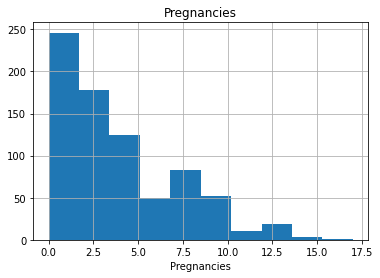

Glucose:
count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
100%    199.000
max     199.000
Name: Glucose, dtype: float64


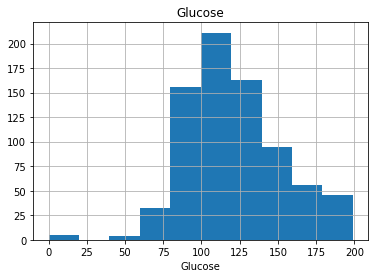

BloodPressure:
count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
100%    122.000
max     122.000
Name: BloodPressure, dtype: float64


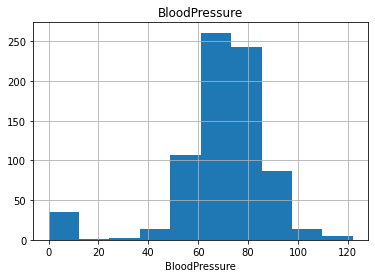

SkinThickness:
count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
100%     99.000
max      99.000
Name: SkinThickness, dtype: float64


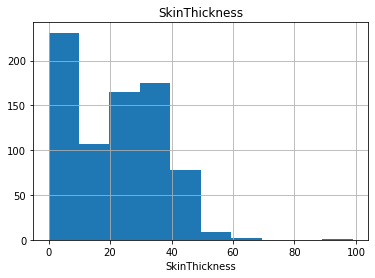

Insulin:
count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
100%    846.000
max     846.000
Name: Insulin, dtype: float64


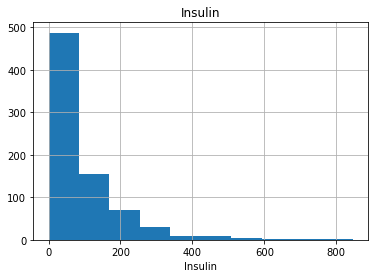

BMI:
count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
100%     67.100
max      67.100
Name: BMI, dtype: float64


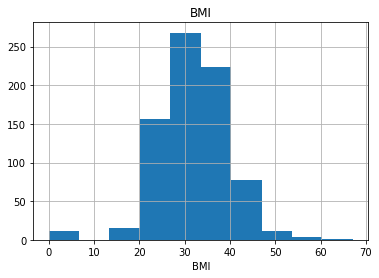

DiabetesPedigreeFunction:
count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
100%      2.420
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


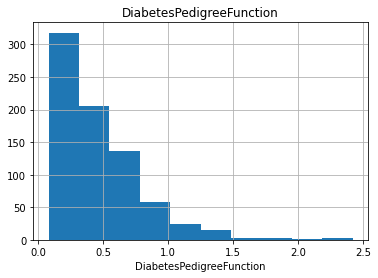

Age:
count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
100%     81.000
max      81.000
Name: Age, dtype: float64


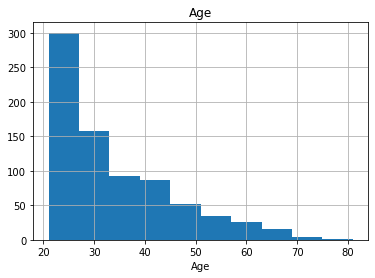

In [17]:
# Nümerik değişkenler için


def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    print(f"{col}:")
    num_summary(df, col, True)

--- 

* BloodPressure: %99'dan %100'e bir sıçrama söz konusu outlierlara dikkat etmeliyiz.
* SkinThickness: %99 değeri 51.3 %100 değeri 99. Outlier söz konusu.
* Insulin: %99 değeri 519.9 %100 değeri 846. Outlier söz konusu.
* BMI: %99 değeri ile %100 değeri arasında sıçrama mevcut.
* Age: %99 değeri ile %100 değeri arasında sıçrama mevcut.

LocalOutlierFactor ile de değişkenleri toplu halde değerlendirebiliriz.

---

   Outcome  Ratio
0      500 65.104
1      268 34.896
##################################


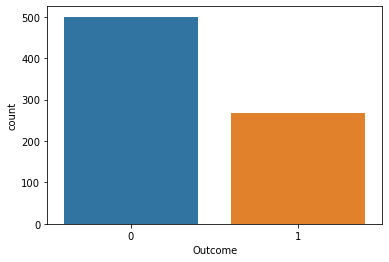

In [18]:
# Kategorik değişkenler için (Elimizde sadece "Outcome" var.)
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio":100*dataframe[col_name].value_counts() / len(dataframe)}))
    print("##################################")
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True) # Birden fazla döngüye girip grafik oluşturacağımız için yazdık.

for col in cat_cols:
    if df[col].dtypes == "bool":
        print(col)
    else:
        cat_summary(df, col, True)

* Elimizdeki verinin %65'inın diyabet test sonucu negatif, yaklaşık %35'i ise diyabet hastası.

## Adım 4:

* Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hede değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)

> * Datamız için Feature Engineering yapmadığımızdan şuan elimizde kategorik değişken yok.
> * Görev 2'de Feature Engineering işlemlerinden sonra tekrar bu analizi yapabiliriz.

In [ ]:
# Kategorik değişkenler vs Bağımlı Değişkenimiz

#def target_summary_with_cat(dataframe, target, categorical_col):
#    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))

#for col in cat_cols:
#    target_summary_with_cat(data, "survived", col)
#    print("#"*20)

In [20]:
# Hedef Değişken ile Numerik Değişkenlerin Analizi

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}))

for col in num_cols:
    target_summary_with_num(df, "Outcome", col)
    print("#"*20)

         Pregnancies
Outcome             
0              3.298
1              4.866
####################
         Glucose
Outcome         
0        109.980
1        141.257
####################
         BloodPressure
Outcome               
0               68.184
1               70.825
####################
         SkinThickness
Outcome               
0               19.664
1               22.164
####################
         Insulin
Outcome         
0         68.792
1        100.336
####################
           BMI
Outcome       
0       30.304
1       35.143
####################
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
####################
           Age
Outcome       
0       31.190
1       37.067
####################


* "Glucose", "Insulin" ve "Pregnancies" değişkenlerinin ortalamasının "Outcome" hedef değişkenimize göre keskin bir farklılığı olduğunu söyleyebiliriz.

## Adım 5:

* Aykırı gözlem analizi yapınız.

> * Aykırı gözlem analizi yapmanın en iyi yolu LocalOutlierFactor kullanmaktır. 
> * Aksi halde her nümerik kolon için ayrı ayrı sınırları hesaplatıp, outlierları drop edersek oldukça fazla data kaybederiz.

In [25]:
# Sınırları belirleyen fonksiyon

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Aykırı değer var mı yok mu fonksiyonu

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    filter1 = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    return dataframe[filter1].any(axis=None) # True/False --> Outlier Var mı? Yok mu?

for col in num_cols:
    print(col, "-->", check_outlier(df, col))

Pregnancies --> True
Glucose --> True
BloodPressure --> True
SkinThickness --> True
Insulin --> True
BMI --> True
DiabetesPedigreeFunction --> True
Age --> True


In [31]:
# Outlierları yakalamak

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10: # Aykırı değer sayısı 10'den fazla ise
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head()) # ilk 5 satırı göster
    else: #Aykırı değer sayısı 10'dan büyük değilse
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))]) # Hepsini getir zaten az var.
    
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index # Outlier değişkenlerin indexleri
        return outlier_index

for col in num_cols:
    print(col)
    print("--"*15)
    x = grab_outliers(df, col, True)
    df.loc[x]
    print("#"*20)

Pregnancies
------------------------------
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
88            15      136             70             32      110 37.100                     0.153   43        1
159           17      163             72             41      114 40.900                     0.817   47        1
298           14      100             78             25      184 36.600                     0.412   46        1
455           14      175             62             30        0 33.600                     0.212   38        1
####################
Glucose
------------------------------
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
75             1        0             48             20        0 24.700                     0.140   22        0
182            1        0             74             20       23 27.700                     0.299   21        0
3

---

**BURADA ELDE ETTİĞİMİZ TÜM AYKIRI DEĞERLERİ DROP ETMEK MANTIKLI DEĞİL. BU YÜZDEN LocalOutlierFactor ile GENEL RESME GÖRE AYKIRI DEĞER YAKALAMAK DAHA AVANTAJLIDIR.**  

---

In [32]:
# LOF nesnesi oluşturduk.

clf = LocalOutlierFactor(n_neighbors=20) # 20 komşuya bak
clf.fit_predict(df) # Nesnemizi datamıza uyguladık. Skorları elde ettik.

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [33]:
df_scores = clf.negative_outlier_factor_ # LOF Skorları tuttuk.
# df_scores = -df_scores
df_scores[:7] # Değerlerin -1'e yakın olmasını dikkate alacağız.

array([-1.06670781, -1.00444029, -1.07964805, -0.9796959 , -1.16949099,
       -0.95585323, -1.08886398])

In [35]:
# En kötü 8 skora bakalım

np.sort(df_scores)[0:12]

array([-2.59693313, -2.48872536, -2.44091629, -2.42704822, -2.40372289,
       -2.37719608, -2.18170559, -1.99003552, -1.90740111, -1.81013029,
       -1.70622643, -1.68995044])

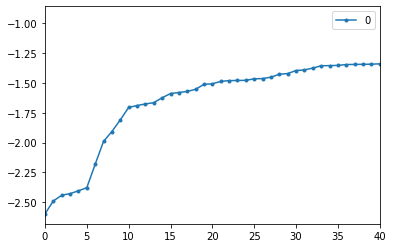

In [40]:
# Skorları elde ettik. Artık yapmamız gereken şey bir threshold belirlemek.
# Bunu elbow yöntemiyle belirleyeceğiz.

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 40], style=".-")
plt.show()

---
> 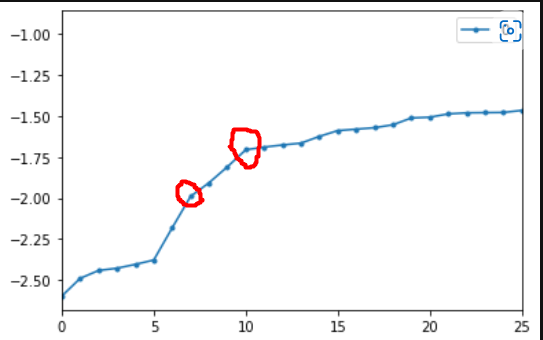

* 7.index veya 10.index threshold olarak seçilebilir.

In [41]:
# Belirlediğimiz threshold 10.indexli değer (11.sıradaki) olsun

th = np.sort(df_scores)[10]
th

-1.7062264314830031

In [42]:
# Aykırı değerler

df[df_scores < th] # Threshold değerimizden küçük olan değerler

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.100,0.398,59,1
75,1,0,48,20,0,24.700,0.140,22,0
106,1,96,122,0,0,22.400,0.207,27,0
182,1,0,74,20,23,27.700,0.299,21,0
228,4,197,70,39,744,36.700,2.329,31,0
342,1,0,68,35,0,32.000,0.389,22,0
349,5,0,80,32,0,41.000,0.346,37,1
459,9,134,74,33,60,25.900,0.460,81,0
502,6,0,68,41,0,39.000,0.727,41,1
579,2,197,70,99,0,34.700,0.575,62,1


In [46]:
# LOF ile elede ettiğimiz Outlier değerlerin atılması

print("Outlier index:", df[df_scores < th].index)
df.drop(df[df_scores < th].index, axis=0, inplace=True)

Outlier index: Int64Index([13, 75, 106, 182, 228, 342, 349, 459, 502, 579], dtype='int64')


In [48]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [50]:
13 in df.index # Outlier değerlerden kurtulduk.

False

## Adım 6:

* Eksik gözlem analizi yapınız.

In [51]:
# Fonksiyonlaştırma

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0] # NaN değere sahip değişken isimleri
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False) # NaN değişken sayıları azalan
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0]*100).sort_values(ascending=False) # NaN değerlerin oranı
    missing_df = pd.concat([n_miss,  np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")
    
    if na_name: # Eksik değerlerin isimleri gelsin mi?
        return na_columns

missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


---

* İlk bakışta her ne kadar "NaN" değer görünmesede aslında datamızda eksik değerler 0 ile doldurulmuş şekilde duruyor. 
* Glucos, Insulin gibi değerler 0 olamaz. Bu noktayı Görev 2 kapsamında  detaylarıyla ele alacağım.

---

## Adım 7:

* Korelasyon analizi yapınız.

In [52]:
# Korelasyon 

corr = df[num_cols].corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000,0.132,0.144,-0.084,-0.073,0.015,-0.038,0.550
Glucose,0.132,1.000,0.165,0.055,0.315,0.236,0.122,0.258
BloodPressure,0.144,0.165,1.000,0.217,0.101,0.287,0.044,0.247
SkinThickness,-0.084,0.055,0.217,1.000,0.467,0.395,0.179,-0.141
Insulin,-0.073,0.315,0.101,0.467,1.000,0.207,0.155,-0.063
BMI,0.015,0.236,0.287,0.395,0.207,1.000,0.136,0.037
DiabetesPedigreeFunction,-0.038,0.122,0.044,0.179,0.155,0.136,1.000,0.033
Age,0.550,0.258,0.247,-0.141,-0.063,0.037,0.033,1.000


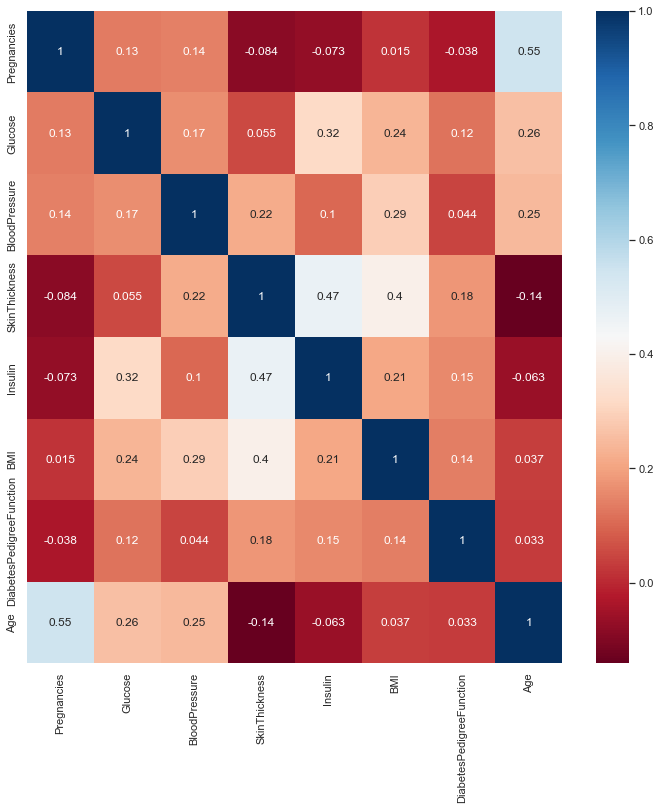

In [54]:
# Heatmap oluşturma

sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True) 
plt.show()

---

* Birbiriyle yüksek korelasyonlu herhangi bir değişkenimiz yok. 
* Bu yüzden herhangi bir threshold belirlemeye ve değişkenleri drop etmeye ihtiyacımız yok.

---

# Görev 2: Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

## Adım 1:

* Eksik ve aykırı değerler için gerekli işlemleri yapınız. Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb. değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0 olamayacaktır. Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik değerlere işlemleri uygulayabilirsiniz.

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
def check_df(dataframe, head=5):
    print("############## Shape ##############")
    print(dataframe.shape)
    
    print("############## Types ##############")
    print(dataframe.dtypes)
    
    print("############## Head ##############")
    print(dataframe.head(head))
    
    print("############## Tail ##############")
    print(dataframe.tail(head))
    
    print("############## NA ##############")
    print(dataframe.isnull().sum())
    
    print("############## Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)

check_df(df)

############## Shape ##############
(768, 9)
############## Types ##############
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
############## Head ##############
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21      

In [5]:
# Datamızdaki eksik değerlere 0 atanmış. 
# "Preganciens" - "Age" - "Outcome" - "DiabetesPedigreeFunction" dışındaki değişkenlerimiz üzerinde 0 olan değerleri "NaN" ile değiştireceğim.

cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[cols] = df[cols].replace(0, np.NaN)
df[cols].head()

# 0 değerlerini NaN'a çevirdik.

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.000,72.000,35.000,NaN,33.600
1,85.000,66.000,29.000,NaN,26.600
2,183.000,64.000,NaN,NaN,23.300
3,89.000,66.000,23.000,94.000,28.100
4,137.000,40.000,35.000,168.000,43.100


In [6]:
# Değişkenlerimizin hepsi nümerik. "Outcome" kolonu target kolon olup, Encode edilmiş halde tutulan kategorik bir değişkendir.
# Genel bakış attığımda "kardinal" değişken olmadığını gördüm.

# Değişkenleri fonksiyon ile yakalayalım.

def grab_col_names(dataframe, cat_th=10, car_th=20):
        #cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    # Encoding halde tutulan ve "cat_th" den daha az unique değişkene sahip cat. değişkenler
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtype != "O" and dataframe[col].nunique() < cat_th]
    
    # "Name" gibi object olmasına rağmen kategorik olmayan yani her değer birbiriyle bağımsız olabilecek kapasitede. Bir anlam ifade etmeyen
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype == "O" and dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat # Kategorik + Encoding Cat.
    cat_cols = [col for col in cat_cols if col not in cat_but_car] # Cardinal olanları ayıkla
    
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 
    num_cols = [col for col in num_cols if col not in num_but_cat] # Encoding cat. değişkenleri ayıkla
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#"*20)
print(cat_cols)
print(num_cols)
print(cat_but_car)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
####################
['Outcome']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[]


In [7]:
# Genel olarak değişkenlerin outliers içerip içermediğine bakıyorum.

# Sınırları belirleyen fonksiyon

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Aykırı değer var mı yok mu fonksiyonu

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    filter1 = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    return dataframe[filter1].any(axis=None) # True/False --> Outlier Var mı? Yok mu?

for col in num_cols:
    print(col, "-->", check_outlier(df, col))
    
# Glucose dışında tüm değişkenlerimiz outliers içeriyor.

Pregnancies --> True
Glucose --> False
BloodPressure --> True
SkinThickness --> True
Insulin --> True
BMI --> True
DiabetesPedigreeFunction --> True
Age --> True


In [8]:
# Outliers ile mücadele ederken BoxPlot yöntemi kullanarak her değişken için outlierları atmak veri kaybı yaşatacağı için mantıklı değil.
# Bu yüzden LocalOutlierFactor yöntemini kullanacağım.
# Genel resime bakarak birbiriyle değerlendirildiğinde outlier potansiyeli içeren değişkenleri bulacağım.
# Bu yüzden "NaN" olarak yer alan eksik değerleri doldurduktan sonra yapmak mantıklı olacaktır.

# "NaN" içeren değişkenleri "Target" değişken kırılımında bir incelemek istersek;

missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0 ]

for col in missing_columns:
    print(df.groupby("Outcome").agg({col:["mean","median"]}))
    print("#"*20)

# Her kolon için eksik değerleri "Outcome" kırılımında "median" ile doldur.
for col in missing_columns:
    df[col].fillna(df.groupby("Outcome")[col].transform("median"), inplace=True)


        Glucose        
           mean  median
Outcome                
0       110.644 107.000
1       142.320 140.000
####################
        BloodPressure       
                 mean median
Outcome                     
0              70.877 70.000
1              75.321 74.500
####################
        SkinThickness       
                 mean median
Outcome                     
0              27.235 27.000
1              33.000 32.000
####################
        Insulin        
           mean  median
Outcome                
0       130.288 102.500
1       206.846 169.500
####################
           BMI       
          mean median
Outcome              
0       30.860 30.100
1       35.407 34.300
####################


In [9]:
# Artık LOF yöntemiyle outlierslar ile mücadele edebiliriz.

# LOF nesnesi oluşturduk.

clf = LocalOutlierFactor(n_neighbors=20) # 20 komşuya bak
clf.fit_predict(df) # Nesnemizi datamıza uyguladık. Skorları elde ettik.

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [10]:
df_scores = clf.negative_outlier_factor_ # LOF Skorları tuttuk.
# df_scores = -df_scores
np.sort(df_scores)[0:10]

array([-2.83284117, -2.59693313, -2.53962794, -2.3029262 , -2.01224601,
       -1.99003552, -1.87179524, -1.79510701, -1.79016565, -1.73291587])

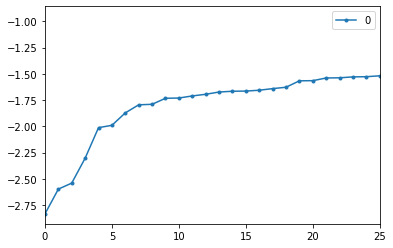

In [11]:
# Skorları elde ettik. Artık yapmamız gereken şey bir threshold belirlemek.
# Bunu elbow yöntemiyle belirleyeceğiz.

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 25], style=".-")
plt.show()

In [12]:
# 9. indexten sonra değerlerin yoğunluk skorları birbirine yaklaşıyor.
# Bu değeri threshold kabul edebiliriz.


th = np.sort(df_scores)[9]

print("Outlier index:", df[df_scores < th].index)
df.drop(df[df_scores < th].index, axis=0, inplace=True)

Outlier index: Int64Index([13, 106, 125, 228, 445, 459, 537, 579, 597], dtype='int64')


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


## Adım 2:

* Yeni değişkenler oluşturunuz.

---  

* **Her değişkeni kendi içerisinde "Outcome" kırılımında gruplayabilir miyiz?**
* Öncelikle tüm değişkenler için bunu deneyeceğim.  

---

In [14]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [15]:
# "Age" değişkenini Genç ve Yaşlı olarak 2'ye ayırarak, "Outcome" özelinde kırılımına bakalım.

df.loc[(df['Age'] >= 21) & (df['Age'] < 35),'NEW_AGE_CAT'] = 'young'
df.loc[(df['Age'] >= 35) & (df['Age'] < 55), 'NEW_AGE_CAT'] = 'mature'


df.groupby("NEW_AGE_CAT").agg({"Outcome":["count", "mean"]})

# Yaşlı sınıfı genç sınıfına göre 2 kat daha fazla hastalık riski taşıyor diyebilir miyiz?

Outcome      
              count  mean
NEW_AGE_CAT              
mature          226 0.549
young           483 0.257

In [16]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df['NEW_AGE_CAT'] == "young", "Outcome"].sum(),
                                             df.loc[df['NEW_AGE_CAT'] == "mature", "Outcome"].sum()],
                                      
                                      nobs = [df.loc[df['NEW_AGE_CAT'] == "young", "Outcome"].shape[0],
                                              df.loc[df['NEW_AGE_CAT'] == "mature", "Outcome"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = -7.5958, p-value = 0.0000


In [17]:
# BMI değerleri ideal ve altı olanlar ile overweight ve üstü olanlar arasında "Outcome" kırılımında bir fark var mı?

df.loc[(df['BMI'] > df["BMI"].min()) & (df['BMI'] < 30), 'BMI_CLASS'] = 'ideal'
df.loc[(df['BMI'] > 30), "BMI_CLASS"] = 'overweight'

df.groupby("BMI_CLASS").agg({"Outcome":["count", "mean"]})

# Kilolu ve obez sınıflarının daha fazla Diyabet riski taşıdığını söyleyebilir miyiz?

Outcome      
             count  mean
BMI_CLASS               
ideal          278 0.169
overweight     471 0.452

In [18]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df['BMI_CLASS'] == "ideal", "Outcome"].sum(),
                                             df.loc[df['BMI_CLASS'] == "overweight", "Outcome"].sum()],
                                      
                                      nobs = [df.loc[df['BMI_CLASS'] == "ideal", "Outcome"].shape[0],
                                              df.loc[df['BMI_CLASS'] == "overweight", "Outcome"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = -7.8645, p-value = 0.0000


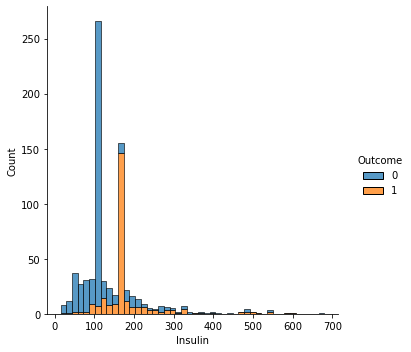

In [19]:
# Insulin değişkeni içerisinde bir gruplama yapabilir miyim?

sns.displot(df, x="Insulin", hue="Outcome", multiple="stack")

In [20]:
# Threshold 180 belirlersem "Outcome" kırılımında sonuç ne olur?

df.loc[(df['Insulin'] < 180) ,'NEW_INSULIN'] = 0
df.loc[(df['Insulin'] >= 180) , 'NEW_INSULIN'] = 1

df.groupby("NEW_INSULIN").agg({"Outcome":["mean", "count"]})
# Insulin değeri 180 ve üstü olan kişilerin diyabet olma olasılığı daha yüksek diyebilir miyiz?

Outcome      
               mean count
NEW_INSULIN              
0.000         0.318   645
1.000         0.518   114

In [21]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df['NEW_INSULIN'] == 1, "Outcome"].sum(),
                                             df.loc[df['NEW_INSULIN'] == 0, "Outcome"].sum()],
                                      
                                      nobs = [df.loc[df['NEW_INSULIN'] == 1, "Outcome"].shape[0],
                                              df.loc[df['NEW_INSULIN'] == 0, "Outcome"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 4.1272, p-value = 0.0000


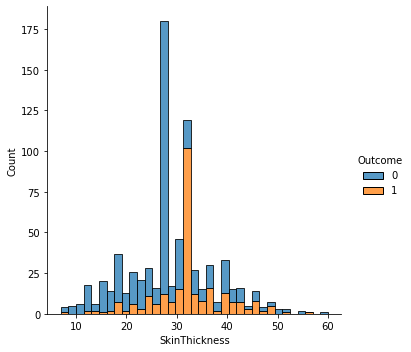

In [22]:
# SkinThickness değişkeni içerisinde bir gruplama yapabilir miyim?

sns.displot(df, x="SkinThickness", hue="Outcome", multiple="stack")

In [23]:
# Threshold 28 belirlersem "Outcome" kırılımında sonuç ne olur?

df.loc[(df['SkinThickness'] < 28) ,'NEW_SKIN'] = 0
df.loc[(df['SkinThickness'] >= 28) , 'NEW_SKIN'] = 1

df.groupby("NEW_SKIN").agg({"Outcome":["mean", "count"]})

# SkinThickness değeri 28 ve üstü olan kişilerin diyabet olma olasılığı çok daha yüksek diyebilir miyiz?

Outcome      
            mean count
NEW_SKIN              
0.000      0.134   374
1.000      0.556   385

In [24]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df['NEW_SKIN'] == 1, "Outcome"].sum(),
                                             df.loc[df['NEW_SKIN'] == 0, "Outcome"].sum()],
                                      
                                      nobs = [df.loc[df['NEW_SKIN'] == 1, "Outcome"].shape[0],
                                              df.loc[df['NEW_SKIN'] == 0, "Outcome"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 12.2083, p-value = 0.0000


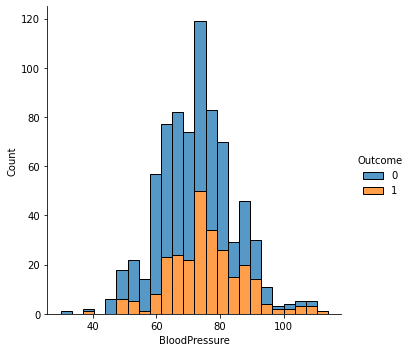

In [25]:
# BloodPressure değişkeni içerisinde bir gruplama yapabilir miyim?

sns.displot(df, x="BloodPressure", hue="Outcome", multiple="stack")

In [26]:
# Threshold 70 belirlersem "Outcome" kırılımında sonuç ne olur?

df.loc[(df['BloodPressure'] < 70) ,'NEW_BLOOD'] = 0
df.loc[(df['BloodPressure'] >= 70) , 'NEW_BLOOD'] = 1

df.groupby("NEW_BLOOD").agg({"Outcome":["mean", "count"]})

# BloodPressure değeri 70 ve üstü olan kişilerin diyabet olma olasılığı çok daha yüksek diyebilir miyiz?

Outcome      
             mean count
NEW_BLOOD              
0.000       0.244   279
1.000       0.408   480

In [27]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df['NEW_BLOOD'] == 1, "Outcome"].sum(),
                                             df.loc[df['NEW_BLOOD'] == 0, "Outcome"].sum()],
                                      
                                      nobs = [df.loc[df['NEW_BLOOD'] == 1, "Outcome"].shape[0],
                                              df.loc[df['NEW_BLOOD'] == 0, "Outcome"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 4.5908, p-value = 0.0000


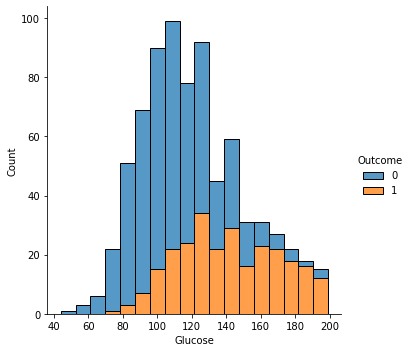

In [28]:
# Glucose değişkeni içerisinde bir gruplama yapabilir miyim?

sns.displot(df, x="Glucose", hue="Outcome", multiple="stack")

In [29]:
# Threshold 125 belirlersem "Outcome" kırılımında sonuç ne olur?

df.loc[(df['Glucose'] < 125) ,'NEW_GLUCOSE'] = 0
df.loc[(df['Glucose'] >= 125) , 'NEW_GLUCOSE'] = 1

df.groupby("NEW_GLUCOSE").agg({"Outcome":["mean", "count"]})

# BloodPressure değeri 125 ve üstü olan kişilerin diyabet olma olasılığı çok daha yüksek diyebilir miyiz?

Outcome      
               mean count
NEW_GLUCOSE              
0.000         0.182   451
1.000         0.591   308

In [30]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df['NEW_GLUCOSE'] == 1, "Outcome"].sum(),
                                             df.loc[df['NEW_GLUCOSE'] == 0, "Outcome"].sum()],
                                      
                                      nobs = [df.loc[df['NEW_GLUCOSE'] == 1, "Outcome"].shape[0],
                                              df.loc[df['NEW_GLUCOSE'] == 0, "Outcome"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 11.6198, p-value = 0.0000


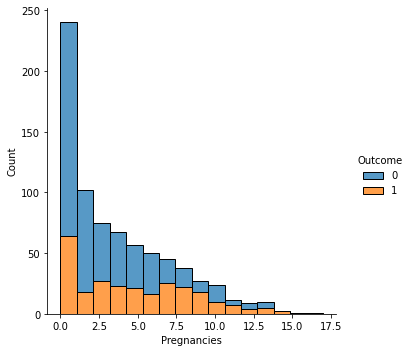

In [31]:
# Pregnancies değişkeni içerisinde bir gruplama yapabilir miyim?

sns.displot(df, x="Pregnancies", hue="Outcome", multiple="stack")

In [32]:
# Threshold 6 belirlersem "Outcome" kırılımında sonuç ne olur?

df.loc[(df['Pregnancies'] < 6) ,'NEW_PREGNANCIES'] = 0
df.loc[(df['Pregnancies'] >= 6) , 'NEW_PREGNANCIES'] = 1

df.groupby("NEW_PREGNANCIES").agg({"Outcome":["mean", "count"]})

# Pregnancies değeri 6 ve üstü olan kişilerin diyabet olma olasılığı çok daha yüksek diyebilir miyiz?

Outcome      
                   mean count
NEW_PREGNANCIES              
0.000             0.283   541
1.000             0.509   218

In [33]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df['NEW_PREGNANCIES'] == 1, "Outcome"].sum(),
                                             df.loc[df['NEW_PREGNANCIES'] == 0, "Outcome"].sum()],
                                      
                                      nobs = [df.loc[df['NEW_PREGNANCIES'] == 1, "Outcome"].shape[0],
                                              df.loc[df['NEW_PREGNANCIES'] == 0, "Outcome"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 5.9245, p-value = 0.0000


> * Değişkenlerin birbiriyle olan grafiklerine bakıp, farklı değişkenler oluşturulabilir.
> * Tamamen hayal dünyamıza kalmış bir durum. Çeşitli denemeler ve çaprazlamalar yapabiliriz.

---

* Bazı değişkenleri birlikte değerlendirerek farklı gruplamalar denedim.
* Daha farklı senaryolar ortaya çıkabilir.


In [34]:
# Hamilelik ve BMI değerlerini birlikte ele alırsak acaba bir ilişki yakalayabilir miyiz?

df.loc[((df["Pregnancies"] * df["BMI"]) >= 200), "PREG_BMI"] = "YES" # Outcome:1
df.loc[((df["Pregnancies"] * df["BMI"]) < 200), "PREG_BMI"] = "NO" # Outcome:0

df.groupby("PREG_BMI").agg({"Outcome": "mean"})

# İlişkiye göre açık bir şekilde bir farklılık var diyebilir miyiz?

,Outcome
PREG_BMI,
NO,0.277
YES,0.579


In [35]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df['PREG_BMI'] == "YES", "Outcome"].sum(),
                                             df.loc[df['PREG_BMI'] == "NO", "Outcome"].sum()],
                                      
                                      nobs = [df.loc[df['PREG_BMI'] == "YES", "Outcome"].shape[0],
                                              df.loc[df['PREG_BMI'] == "NO", "Outcome"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 7.3903, p-value = 0.0000


## Adım 3:

* Encoding işlemlerini gerçekleştiriniz.

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,BMI_CLASS,NEW_INSULIN,NEW_SKIN,NEW_BLOOD,NEW_GLUCOSE,NEW_PREGNANCIES,PREG_BMI
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,mature,overweight,0.000,1.000,1.000,1.000,1.000,YES
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,young,ideal,0.000,1.000,0.000,0.000,0.000,NO
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,young,ideal,0.000,1.000,0.000,1.000,1.000,NO
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,ideal,0.000,0.000,0.000,0.000,0.000,NO
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,young,overweight,0.000,1.000,0.000,1.000,0.000,NO


In [37]:
# Yeni oluşturduğum kategorik değişkenler 2 sınıflı. Bunlara LabelEncoding uyguluyorum.

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='Age'>

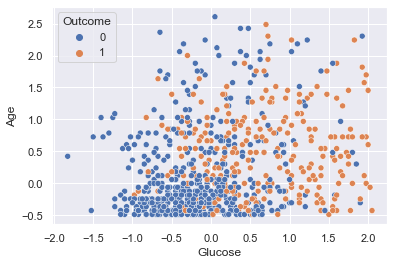

In [50]:
sns.scatterplot("Glucose", "Age", hue="Outcome", data=df)

## Adım 4:

* Numerik değişkenler için standartlaştırma yapınız.

In [38]:
for col in num_cols:
    rs = RobustScaler()
    df[col] = rs.fit_transform(df[[col]])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,BMI_CLASS,NEW_INSULIN,NEW_SKIN,NEW_BLOOD,NEW_GLUCOSE,NEW_PREGNANCIES,PREG_BMI
0,0.600,0.775,0.000,1.000,1.000,0.167,0.676,1.273,1,0,1,0.000,1.000,1.000,1.000,1.000,1
1,-0.400,-0.800,-0.375,0.143,0.000,-0.611,-0.044,0.121,0,1,0,0.000,1.000,0.000,0.000,0.000,0
2,1.000,1.650,-0.500,0.571,1.000,-0.978,0.794,0.182,1,1,0,0.000,1.000,0.000,1.000,1.000,0
3,-0.400,-0.700,-0.375,-0.714,-0.127,-0.444,-0.525,-0.485,0,1,0,0.000,0.000,0.000,0.000,0.000,0
4,-0.600,0.500,-2.000,1.000,0.978,1.222,5.013,0.242,1,1,1,0.000,1.000,0.000,1.000,0.000,0


## Adım 5:

* Model oluşturunuz.

In [39]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=17).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8771929824561403

In [45]:
# Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

y = df["Outcome"]
X = df.drop("Outcome", axis=1)

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores.mean()

0.8800877192982457

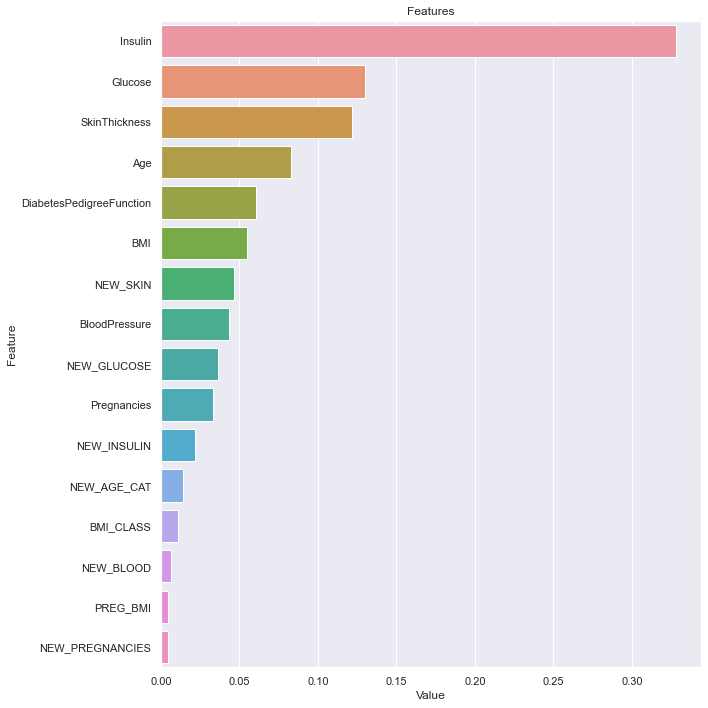

In [40]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X_train)